# Stock Price Prediction Using Neural Networks (RNN and LSTM)

### Overview
In the ever-evolving world of finance, the ability to predict stock prices accurately holds immense value. This project delves into the intersection of data science and financial markets, employing cutting-edge techniques to forecast stock prices for a diverse portfolio of companies. By harnessing the potential of Recurrent Neural Networks (RNN) and Long Short-Term Memory (LSTM) networks, this project endeavors to unlock insights hidden within historical stock price data.

### Introduction
This project immerses itself in the realm of data science with a focus on predicting stock prices – a domain of paramount importance in today's financial landscape. Our objective is twofold: to harness the power of deep learning models for stock price prediction and to provide investors with valuable tools to make informed decisions. By exploring the nuances of stock market data, this project aspires to equip individuals with predictive models that transcend traditional financial analysis.

To achieve this goal, we embark on a multifaceted journey encompassing data collection, preprocessing, model architecture design, and model evaluation. Python and TensorFlow/Keras serve as our trusty companions throughout this voyage, enabling us to construct and assess robust neural networks.

### Methodologies

Data Collection and Preprocessing

    The project begins by collecting historical stock price data for a carefully selected portfolio of companies, including Apple Inc. (AAPL), Amazon.com Inc. (AMZN), The Coca-Cola Company (COKE), JPMorgan Chase & Co. (JPM), 3M Company (MMM), Microsoft Corporation (MSFT), Procter & Gamble Co. (PG), and Walmart Inc. (WMT). These datasets are sourced from Yahoo Finance and are chosen to represent a diverse range of industries. These datasets are meticulously organized and split into training and testing sets, enabling us to evaluate our models' predictive capabilities effectively. The data is then scaled using Min-Max scaling to allow for better predictions.

Model Architecture

Long Short-Term Memory (LSTM) Model

    LSTM Layers: The LSTM model consists of two LSTM layers, each containing 50 units. LSTM layers are well-suited for capturing sequential patterns in time series data.

    Dense Layers: Following the LSTM layers, there are two dense layers in the model. The first dense layer contains 25 units, and the final output layer consists of a single unit for predicting stock prices.

    Loss Function and Optimizer: The model is compiled with a mean squared error (MSE) loss function and the Adam optimizer, a popular choice for training deep learning models.

Recurrent Neural Network (RNN) Model
    RNN Layers: The RNN model comprises two SimpleRNN layers, each with 50 units. SimpleRNN layers are used to capture temporal dependencies in the data.

    Dense Layers: Similar to the LSTM model, there are two dense layers in the RNN model. The first dense layer contains 25 units, and the final output layer consists of a single unit for price prediction.

    Loss Function and Optimizer: The RNN model is also compiled with MSE as the loss function and the Adam optimizer.

Model Training

    Both the LSTM and RNN models are trained for 5 epochs with a batch size of 32. These parameters strike a balance between model convergence and computational efficiency.
   
Model Evaluation

    After training, the models are used to make predictions on the test dataset. Predictions are scaled back to their original price range using Min-Max scaling to facilitate meaningful evaluation.

    Evaluation Metrics: Several evaluation metrics are employed to assess model performance:

    Mean Squared Error (MSE): Measures the average squared difference between predicted and actual prices.
    Root Mean Squared Error (RMSE): Represents the square root of MSE and provides insights into prediction accuracy in the original price units.
    Mean Absolute Error (MAE): Measures the average absolute difference between predicted and actual prices.
    Mean Percentage Absolute Error (MPAE): Calculates the mean percentage absolute error, offering a perspective on prediction accuracy as a percentage of actual prices.

Why these algorithms?

    Stock price data inherently possesses a temporal dimension. Past stock prices influence future prices, and identifying these intricate dependencies is crucial for accurate predictions. RNNs and LSTMs excel in modeling sequential data, making them well-suited for this task.

    RNNs: RNNs are designed to handle sequential data by maintaining hidden states that capture information from previous time steps. They are capable of capturing short-term dependencies in the data.

    LSTMs: LSTMs, a specialized type of RNN, were introduced to overcome the limitations of traditional RNNs. LSTMs are equipped with a more sophisticated memory mechanism, allowing them to capture both short-term and long-term dependencies. This makes them particularly effective for modeling stock price data, which often exhibits complex patterns over time.

### Results
Our journey through the world of stock price prediction using deep learning models has yielded promising results. Here are some key takeaways:

LSTM and RNN models showcase the potential to capture complex temporal dependencies in stock price data.
Evaluation metrics such as RMSE and MAE indicate that our models can make reasonably accurate predictions.
Visualizations of actual vs. predicted stock prices offer insights into the models' performance.
This project stands as a testament to the power of data science and deep learning in the realm of finance. As we navigate the intricate landscape of stock price prediction, we embrace the potential to empower investors with tools that enhance their decision-making processes and enable them to navigate the dynamic world of financial markets with greater confidence.

Model Results
    On the final runthrough of the code, we can see that the LSTM models outpreform the RNN on all stocks except Procter & Gamble Co. (PG). Out of all of the runthroughs it has been very rare to see a RNN outpreform a LSTM model, and even though in this case the RNN's prediction is more accurate, it is not that much more accurate than the LSTM model. Where looking at the LSTM model we can see that it is significantly more accurate on all other stocks. From this, I have concluded that the LSTM model is a better method of predicting stock prices than the RNN, even if there is an off chance the RNN makes a slightly better prediction every once in a while. 

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, SimpleRNN, Dense

In [2]:
# Load data
stocks = {
    "AAPL": pd.read_csv(r"C:\Users\Ethan Scott\Downloads\Personal Project\Data-Portfolio\Python\Stock Price Prediction\AAPL.csv"),
    "AMZN": pd.read_csv(r"C:\Users\Ethan Scott\Downloads\Personal Project\Data-Portfolio\Python\Stock Price Prediction\AMZN.csv"),
    "COKE": pd.read_csv(r"C:\Users\Ethan Scott\Downloads\Personal Project\Data-Portfolio\Python\Stock Price Prediction\COKE.csv"),
    "JPM": pd.read_csv(r"C:\Users\Ethan Scott\Downloads\Personal Project\Data-Portfolio\Python\Stock Price Prediction\JPM.csv"),
    "MMM": pd.read_csv(r"C:\Users\Ethan Scott\Downloads\Personal Project\Data-Portfolio\Python\Stock Price Prediction\MMM.csv"),
    "MSFT": pd.read_csv(r"C:\Users\Ethan Scott\Downloads\Personal Project\Data-Portfolio\Python\Stock Price Prediction\MSFT.csv"),
    "PG": pd.read_csv(r"C:\Users\Ethan Scott\Downloads\Personal Project\Data-Portfolio\Python\Stock Price Prediction\PG.csv"),
    "WMT": pd.read_csv(r"C:\Users\Ethan Scott\Downloads\Personal Project\Data-Portfolio\Python\Stock Price Prediction\WMT.csv")
}

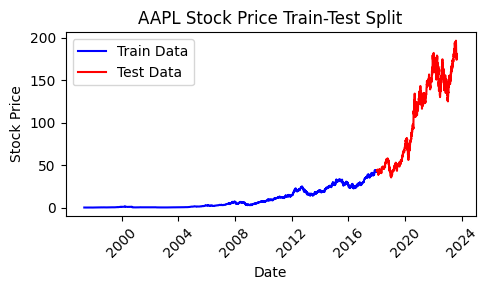

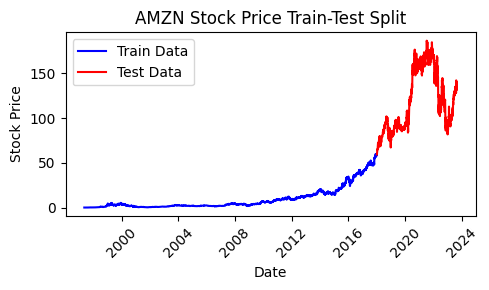

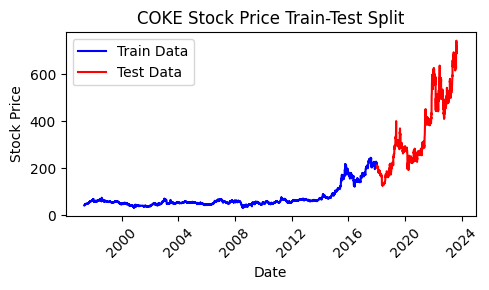

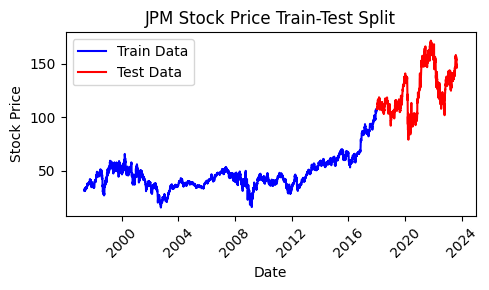

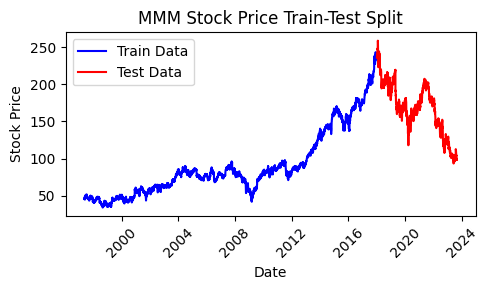

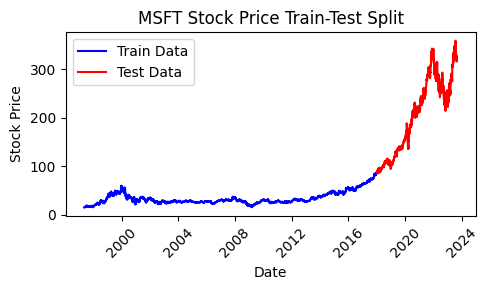

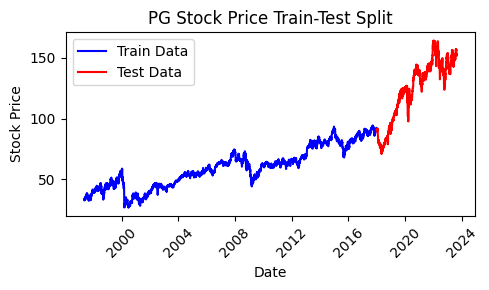

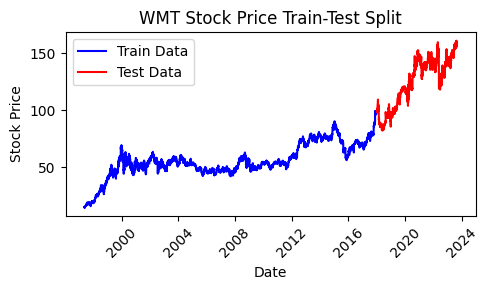

In [3]:
# Plot train and test data splits for each stock
for stock_symbol, stock_data in stocks.items():
    dates = pd.to_datetime(stock_data['Date'])
    prices = stock_data['Close']
    
    # Find the index for the split date
    split_date = pd.to_datetime('2018-01-01')
    split_index = np.where(dates >= split_date)[0][0]

    # Plot train and test data
    plt.figure(figsize=(5, 3))
    plt.plot(dates[:split_index], prices[:split_index], color='blue', label='Train Data')
    plt.plot(dates[split_index:], prices[split_index:], color='red', label='Test Data')
    plt.title(f"{stock_symbol} Stock Price Train-Test Split")
    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.legend()
    plt.tight_layout()
    plt.show()

## Getting Data ready for Neural Networks

In [4]:
AAPL = stocks['AAPL']
AMZN = stocks['AMZN']
COKE = stocks['COKE']
JPM = stocks['JPM']
MMM = stocks['MMM']
MSFT = stocks['MSFT']
PG = stocks['PG']
WMT = stocks['WMT']
AAPL.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6608,2023-08-18,172.300003,175.100006,171.960007,174.490005,174.490005,61114200
6609,2023-08-21,175.070007,176.130005,173.740005,175.839996,175.839996,46311900
6610,2023-08-22,177.059998,177.679993,176.250000,177.229996,177.229996,42084200
6611,2023-08-23,178.520004,181.550003,178.330002,181.119995,181.119995,52722800
6612,2023-08-24,180.669998,181.100006,176.009995,176.380005,176.380005,54945800


In [5]:
# Define the prepare_data function
def prepare_data(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)


In [6]:
scalers = {}
# Create scalers for each stock symbol and store them in the dictionary
for stock_symbol, stock_data in stocks.items():
    scalers[stock_symbol] = MinMaxScaler()
    scalers[stock_symbol].fit(stock_data['Close'].values.reshape(-1, 1))


In [7]:
# Define the number of time steps for the LSTM
time_steps = 60

# Define a dictionary to store the prepared data for each stock
prepared_data = {}

# Loop through each stock and prepare data
for stock_symbol, stock_data in stocks.items():
    split_date = pd.to_datetime('2018-01-01')  # Convert split_date to Timestamp
    
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])  # Convert 'Date' column to DatetimeIndex
    stock_data.set_index('Date', inplace=True)  # Set 'Date' as index
    
    train_data = stock_data[stock_data.index < split_date]
    test_data = stock_data[stock_data.index >= split_date]

    train_prices = train_data['Close'].values.reshape(-1, 1)
    train_scaled = scalers[stock_symbol].transform(train_prices)
    xtrain, ytrain = prepare_data(train_scaled, time_steps)

    test_prices = test_data['Close'].values.reshape(-1, 1)
    test_scaled = scalers[stock_symbol].transform(test_prices)
    xtest, ytest = prepare_data(test_scaled, time_steps)

    prepared_data[stock_symbol] = {
        'xtrain': xtrain,
        'ytrain': ytrain,
        'xtest': xtest,
        'ytest': ytest
    }

## Long Short Term Memory (LSTM) Model for Price Prediction

In [8]:
# Define a dictionary to store the trained models
trained_models = {}

# Loop through each stock and create and train the LSTM model
for stock_symbol in stocks.keys():
    model = Sequential([
        LSTM(50, input_shape=(time_steps, 1), return_sequences=True),
        LSTM(50, return_sequences=False),
        Dense(25),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    print(stock_symbol)
    model.fit(prepared_data[stock_symbol]['xtrain'], prepared_data[stock_symbol]['ytrain'], epochs=5, batch_size=32, validation_split=0.2)
    trained_models[stock_symbol] = model

AAPL
Epoch 1/5
129/129 [==============================] - 8s 34ms/step - loss: 8.2119e-05 - val_loss: 2.5410e-05
Epoch 2/5
129/129 [==============================] - 4s 29ms/step - loss: 3.7976e-06 - val_loss: 2.3182e-05
Epoch 3/5
129/129 [==============================] - 4s 29ms/step - loss: 4.3600e-06 - val_loss: 2.7420e-05
Epoch 4/5
129/129 [==============================] - 4s 29ms/step - loss: 3.6063e-06 - val_loss: 3.2984e-05
Epoch 5/5
129/129 [==============================] - 4s 30ms/step - loss: 4.2952e-06 - val_loss: 2.8325e-05
AMZN
Epoch 1/5
129/129 [==============================] - 8s 35ms/step - loss: 4.5688e-05 - val_loss: 4.2691e-05
Epoch 2/5
129/129 [==============================] - 4s 29ms/step - loss: 3.4640e-06 - val_loss: 3.8610e-05
Epoch 3/5
129/129 [==============================] - 4s 30ms/step - loss: 3.0745e-06 - val_loss: 4.4197e-05
Epoch 4/5
129/129 [==============================] - 4s 30ms/step - loss: 2.8822e-06 - val_loss: 3.6315e-05
Epoch 5/5
129/129 

43/43 [==============================] - 1s 10ms/step


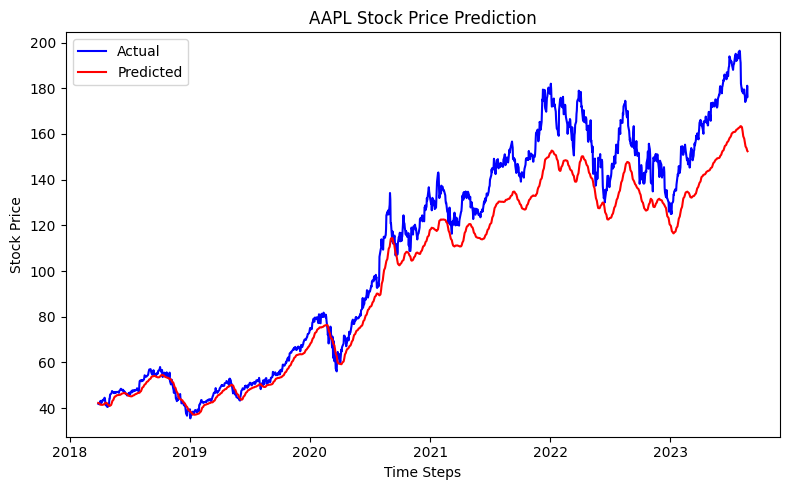

AAPL Stock Price Prediction Evaluation:
MSE: 210.1453
RMSE: 14.4964
MAE: 11.3119
MPAE: 8.76%
43/43 [==============================] - 1s 9ms/step


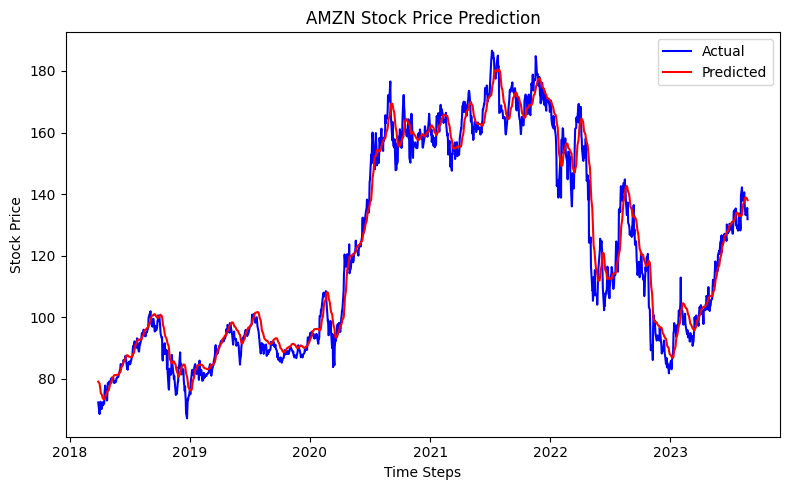

AMZN Stock Price Prediction Evaluation:
MSE: 33.2900
RMSE: 5.7698
MAE: 4.1800
MPAE: 3.59%
43/43 [==============================] - 1s 9ms/step


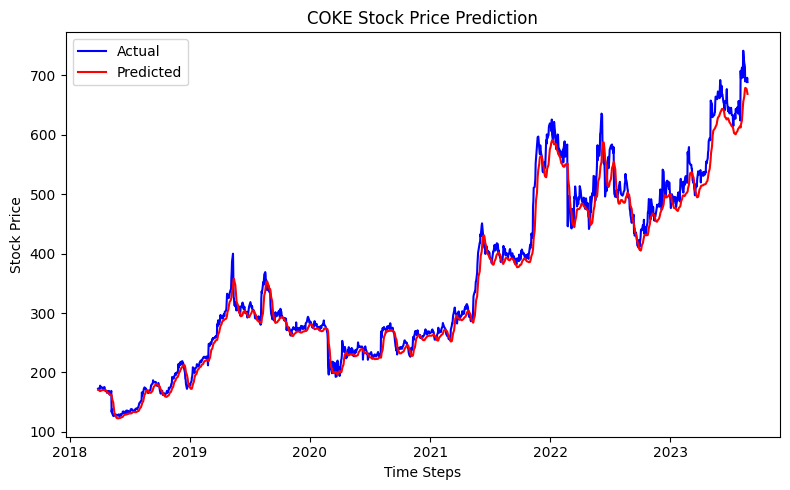

COKE Stock Price Prediction Evaluation:
MSE: 494.4174
RMSE: 22.2355
MAE: 15.5255
MPAE: 4.17%
43/43 [==============================] - 1s 9ms/step


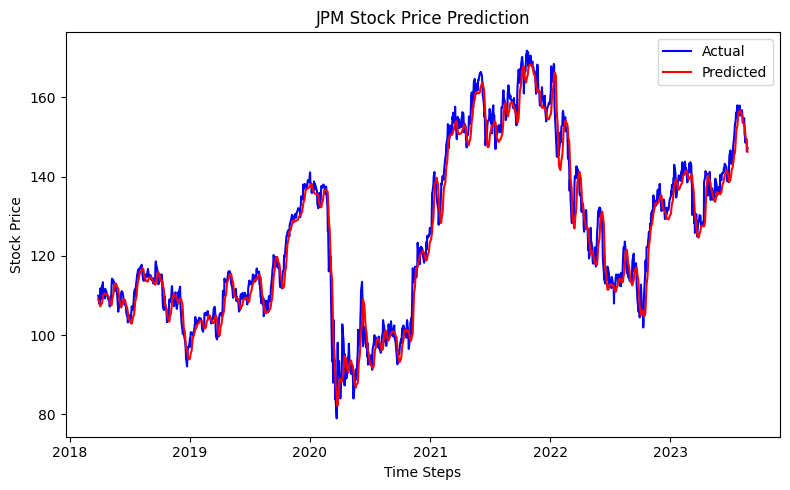

JPM Stock Price Prediction Evaluation:
MSE: 15.4086
RMSE: 3.9254
MAE: 2.9540
MPAE: 2.40%
43/43 [==============================] - 1s 9ms/step


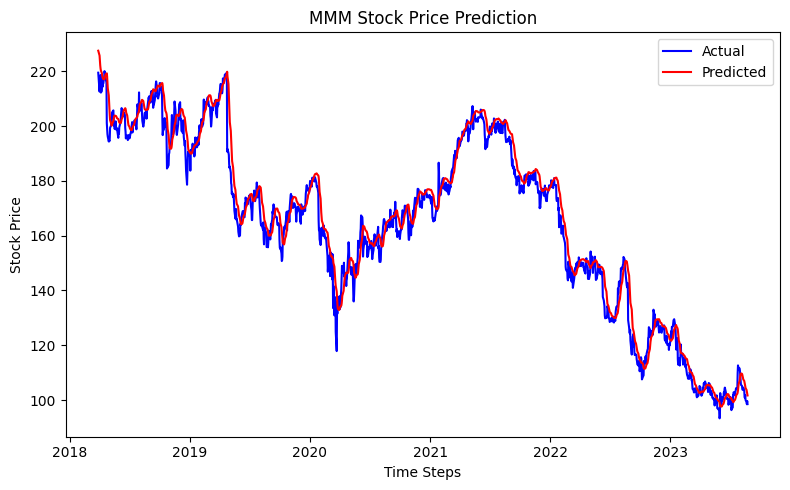

MMM Stock Price Prediction Evaluation:
MSE: 30.2998
RMSE: 5.5045
MAE: 4.0079
MPAE: 2.54%
43/43 [==============================] - 1s 9ms/step


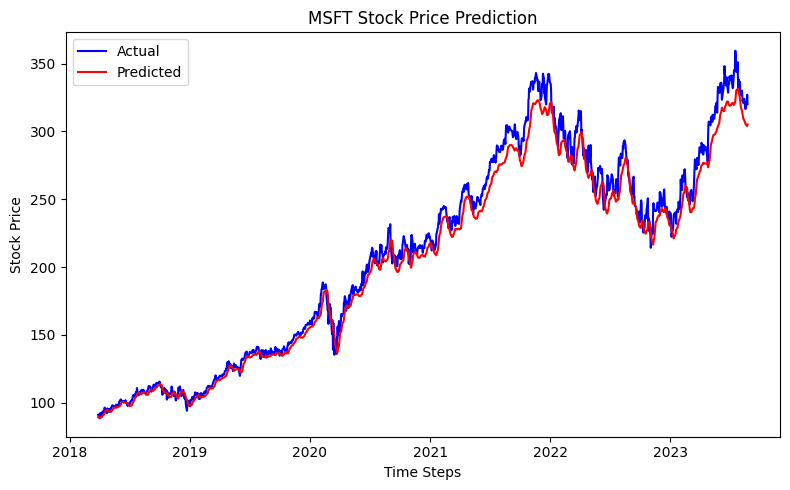

MSFT Stock Price Prediction Evaluation:
MSE: 108.8160
RMSE: 10.4315
MAE: 7.9480
MPAE: 3.43%
43/43 [==============================] - 1s 9ms/step


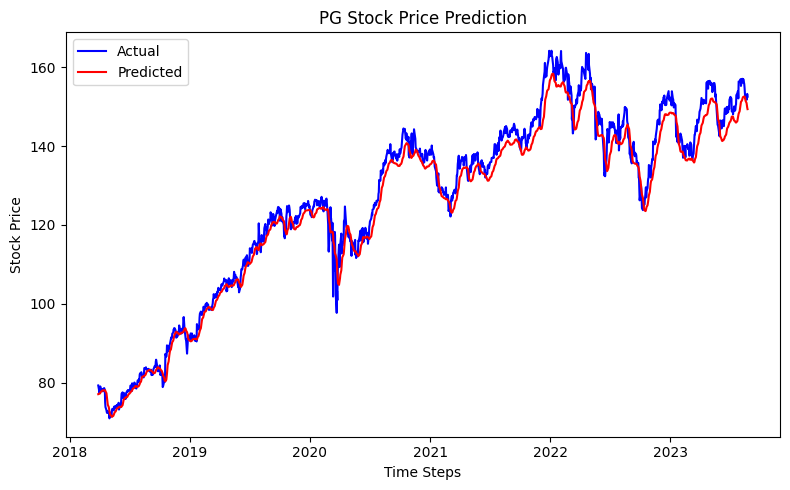

PG Stock Price Prediction Evaluation:
MSE: 12.8358
RMSE: 3.5827
MAE: 2.8974
MPAE: 2.22%
43/43 [==============================] - 1s 9ms/step


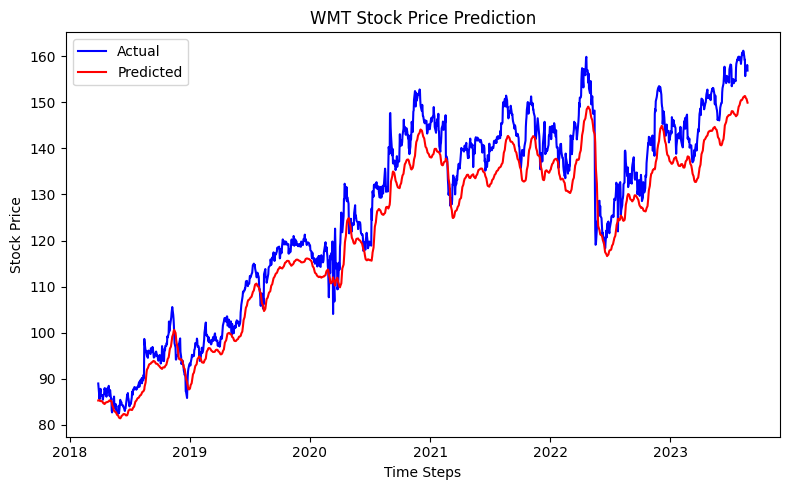

WMT Stock Price Prediction Evaluation:
MSE: 38.9011
RMSE: 6.2371
MAE: 5.3754
MPAE: 4.10%


In [9]:
test_dates = stocks['AAPL'].index.values[-len(prepared_data['AAPL']['ytest']):]

# Loop through each trained model and make predictions
for stock_symbol, model in trained_models.items():
    predictions = model.predict(prepared_data[stock_symbol]['xtest'])
    predictions_actual = scalers[stock_symbol].inverse_transform(predictions)
    ytest_actual = scalers[stock_symbol].inverse_transform(prepared_data[stock_symbol]['ytest'])
    
    
    # Plot the actual test data and predicted results
    plt.figure(figsize=(8, 5))  # Adjust the figure size for better visibility
    plt.plot(test_dates, ytest_actual, label='Actual', color='blue')
    plt.plot(test_dates, predictions_actual, label='Predicted', color='red')
    plt.title(f'{stock_symbol} Stock Price Prediction')
    plt.xlabel('Time Steps')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.tight_layout()
    plt.show()


    # Model Evaluation
    mse = mean_squared_error(ytest_actual, predictions_actual)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(ytest_actual, predictions_actual)
    mpae = np.mean(np.abs((ytest_actual - predictions_actual) / ytest_actual)) * 100

    print(f"{stock_symbol} Stock Price Prediction Evaluation:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MPAE: {mpae:.2f}%")


In [20]:
# Display summaries of LSTM models
print("LSTM Model Summaries:")
for stock_symbol, model in trained_models.items():
    print(f"{stock_symbol} Stock LSTM Model:")
    model.summary()
    print("\n" + "=" * 50 + "\n")

LSTM Model Summaries:
AAPL Stock LSTM Model:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31901 (124.61 KB)
Trainable params: 31901 (124.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


AMZN Stock LSTM Model:
Model: "sequential_1"
__________________________________________________________

## Recurrent Neural Network (RNN) For Stock Prediction


In [15]:
# Define a dictionary to store the trained models
rnn_models = {}

# Loop through each stock and create and train the LSTM model
for stock_symbol in stocks.keys():
    model = Sequential([
        SimpleRNN(50, input_shape=(time_steps,1), return_sequences=True),
        SimpleRNN(50, return_sequences=False),
        Dense(25),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    print(stock_symbol)
    model.fit(prepared_data[stock_symbol]['xtrain'], prepared_data[stock_symbol]['ytrain'], epochs=5, batch_size=32, validation_split=0.2)
    rnn_models[stock_symbol] = model

AAPL
Epoch 1/5
129/129 [==============================] - 3s 14ms/step - loss: 0.0012 - val_loss: 2.6752e-04
Epoch 2/5
129/129 [==============================] - 2s 13ms/step - loss: 2.2594e-05 - val_loss: 1.1837e-04
Epoch 3/5
129/129 [==============================] - 2s 13ms/step - loss: 1.5977e-05 - val_loss: 2.1340e-04
Epoch 4/5
129/129 [==============================] - 2s 12ms/step - loss: 1.3648e-05 - val_loss: 7.1307e-05
Epoch 5/5
129/129 [==============================] - 2s 13ms/step - loss: 1.1418e-05 - val_loss: 5.4728e-05
AMZN
Epoch 1/5
129/129 [==============================] - 3s 15ms/step - loss: 0.0033 - val_loss: 0.0182
Epoch 2/5
129/129 [==============================] - 2s 13ms/step - loss: 4.9309e-05 - val_loss: 0.0086
Epoch 3/5
129/129 [==============================] - 2s 13ms/step - loss: 2.5857e-05 - val_loss: 0.0033
Epoch 4/5
129/129 [==============================] - 2s 13ms/step - loss: 1.6484e-05 - val_loss: 0.0016
Epoch 5/5
129/129 [=======================

43/43 [==============================] - 0s 4ms/step


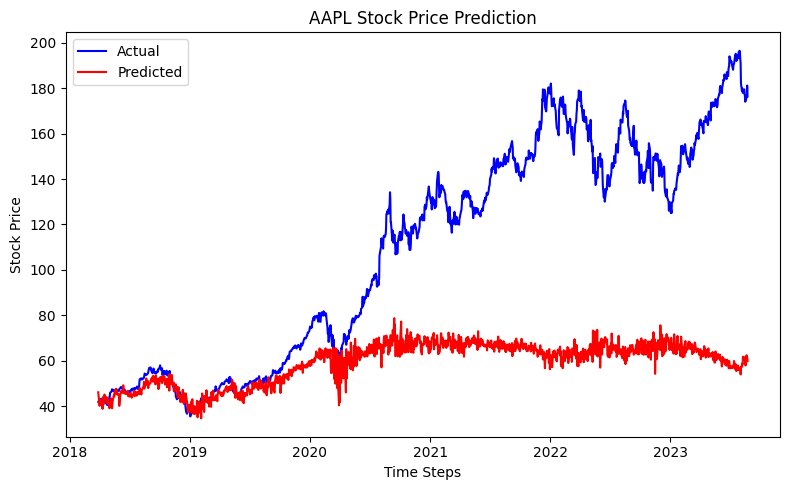

AAPL Stock Price Prediction Evaluation:
MSE: 4230.3178
RMSE: 65.0409
MAE: 49.9544
MPAE: 35.65%
43/43 [==============================] - 0s 4ms/step


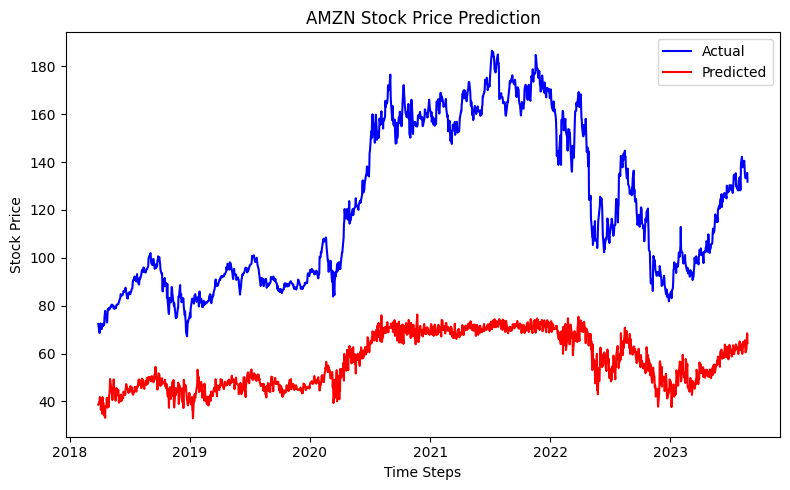

AMZN Stock Price Prediction Evaluation:
MSE: 4632.3125
RMSE: 68.0611
MAE: 64.1337
MPAE: 51.90%
43/43 [==============================] - 0s 5ms/step


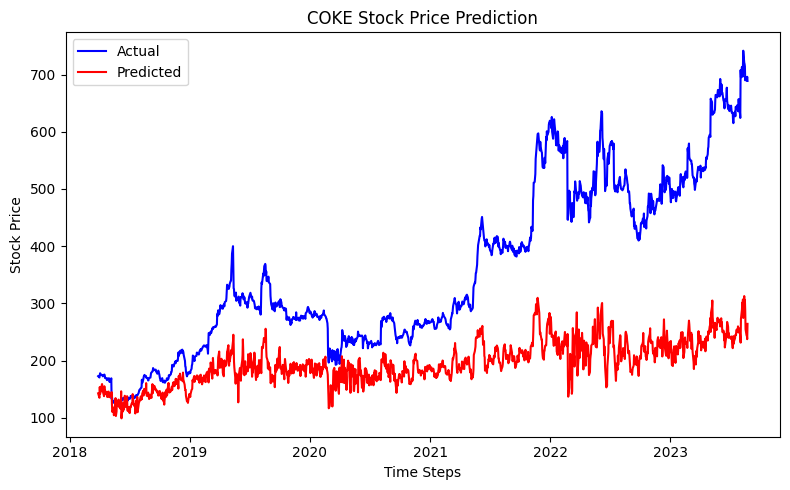

COKE Stock Price Prediction Evaluation:
MSE: 39749.7215
RMSE: 199.3733
MAE: 160.7023
MPAE: 38.93%
43/43 [==============================] - 0s 4ms/step


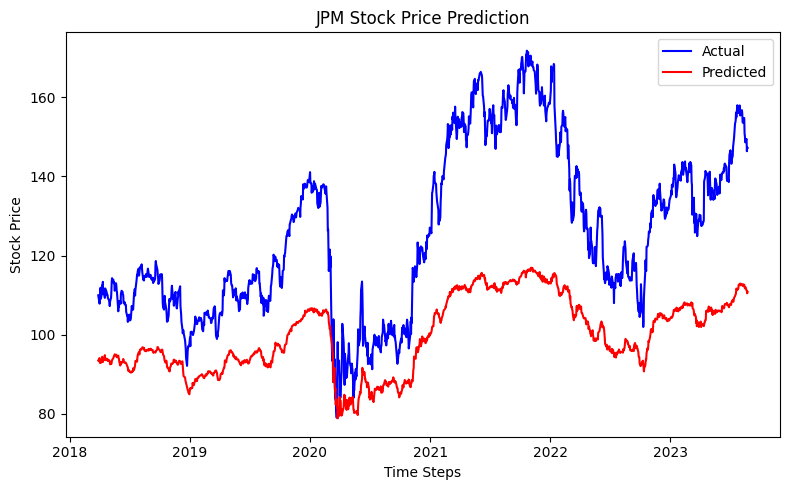

JPM Stock Price Prediction Evaluation:
MSE: 810.0187
RMSE: 28.4608
MAE: 25.6621
MPAE: 19.41%
43/43 [==============================] - 0s 4ms/step


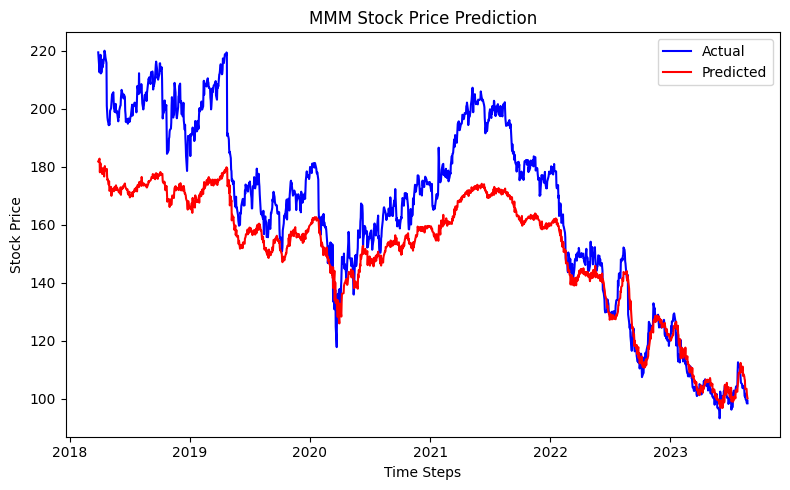

MMM Stock Price Prediction Evaluation:
MSE: 337.2379
RMSE: 18.3640
MAE: 14.8064
MPAE: 8.12%
43/43 [==============================] - 0s 4ms/step


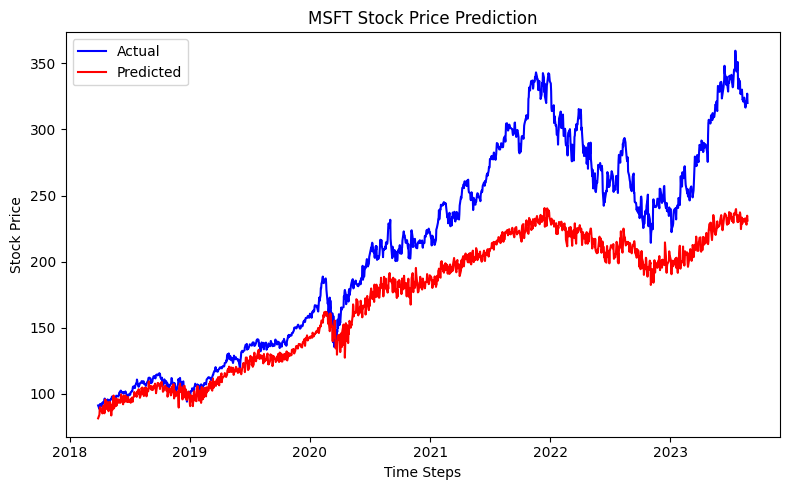

MSFT Stock Price Prediction Evaluation:
MSE: 2485.6415
RMSE: 49.8562
MAE: 39.2977
MPAE: 15.76%
43/43 [==============================] - 0s 4ms/step


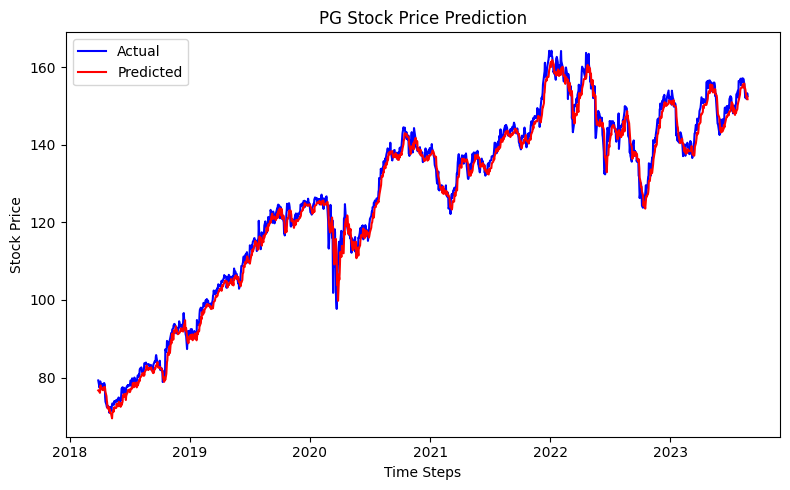

PG Stock Price Prediction Evaluation:
MSE: 6.2867
RMSE: 2.5073
MAE: 1.9415
MPAE: 1.57%
43/43 [==============================] - 0s 4ms/step


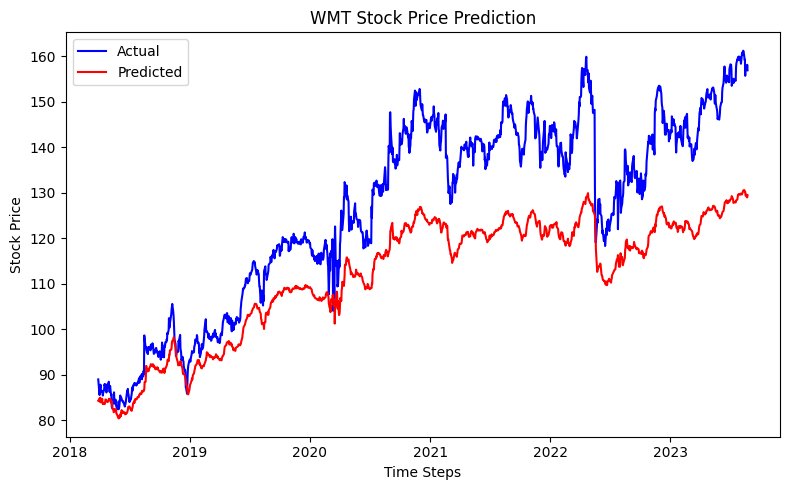

WMT Stock Price Prediction Evaluation:
MSE: 276.5400
RMSE: 16.6295
MAE: 14.6440
MPAE: 10.83%


In [16]:
test_dates = stocks['AAPL'].index.values[-len(prepared_data['AAPL']['ytest']):]

# Loop through each trained model and make predictions
for stock_symbol, model in rnn_models.items():
    predictions = model.predict(prepared_data[stock_symbol]['xtest'])
    predictions_actual = scalers[stock_symbol].inverse_transform(predictions)
    ytest_actual = scalers[stock_symbol].inverse_transform(prepared_data[stock_symbol]['ytest'])
    
    
    # Plot the actual test data and predicted results
    plt.figure(figsize=(8, 5))  # Adjust the figure size for better visibility
    plt.plot(test_dates, ytest_actual, label='Actual', color='blue')
    plt.plot(test_dates, predictions_actual, label='Predicted', color='red')
    plt.title(f'{stock_symbol} Stock Price Prediction')
    plt.xlabel('Time Steps')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.tight_layout()
    plt.show()


    # Model Evaluation
    mse = mean_squared_error(ytest_actual, predictions_actual)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(ytest_actual, predictions_actual)
    mpae = np.mean(np.abs((ytest_actual - predictions_actual) / ytest_actual)) * 100

    print(f"{stock_symbol} Stock Price Prediction Evaluation:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MPAE: {mpae:.2f}%")

In [21]:
# Display summaries of RNN models
print("RNN Model Summaries:")
for stock_symbol, model in rnn_models.items():
    print(f"{stock_symbol} Stock RNN Model:")
    model.summary()
    print("\n" + "=" * 50 + "\n")

RNN Model Summaries:
AAPL Stock RNN Model:
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_32 (SimpleRNN)   (None, 60, 50)            2600      
                                                                 
 simple_rnn_33 (SimpleRNN)   (None, 50)                5050      
                                                                 
 dense_48 (Dense)            (None, 25)                1275      
                                                                 
 dense_49 (Dense)            (None, 1)                 26        
                                                                 
Total params: 8951 (34.96 KB)
Trainable params: 8951 (34.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


AMZN Stock RNN Model:
Model: "sequential_25"
_____________________________________________________________